In [22]:

import pandas as pd
from tbats import TBATS
import matplotlib.pyplot as plt

In [23]:

df = pd.read_csv('pass.csv', sep=',', decimal='.', index_col=0, parse_dates=True)

series = df['Passengers']

<Axes: title={'center': 'Passengers over time'}, xlabel='Month'>

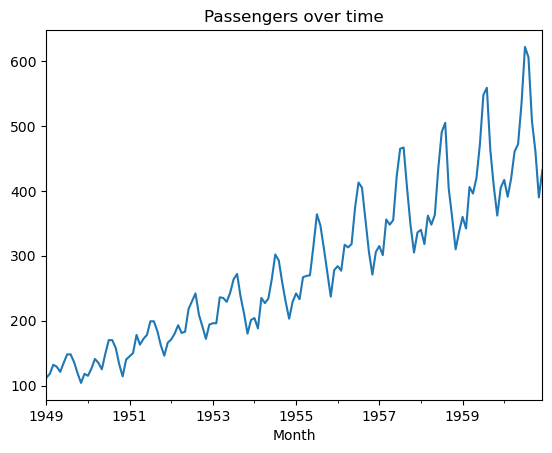

In [24]:
df['Passengers'].plot(title='Passengers over time')

In [25]:
estimator = TBATS(seasonal_periods=[12])
model = estimator.fit(series)



In [26]:
# y_forecasted = model.forecast(steps=12)

C:\Users\Youssef\AppData\Local\Temp\ipykernel_17880\3224008786.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(series.index[-1], periods=forecast_steps+1, freq='M')[1:]


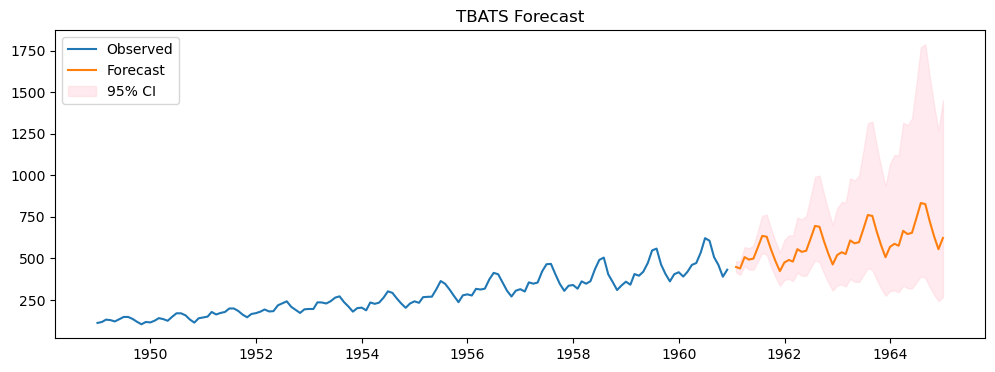

In [36]:
forecast_steps = 48
y_forecast, confidence_intervals = model.forecast(steps=forecast_steps, confidence_level=0.95)

# Plot forecast
plt.figure(figsize=(12, 4))
plt.plot(series.index, series, label='Observed')
forecast_index = pd.date_range(series.index[-1], periods=forecast_steps+1, freq='M')[1:]
plt.plot(forecast_index, y_forecast, label='Forecast')
plt.fill_between(forecast_index,
                 confidence_intervals['lower_bound'],
                 confidence_intervals['upper_bound'],
                 color='pink', alpha=0.3, label='95% CI')
plt.title('TBATS Forecast')
plt.legend()
plt.show()